In [10]:
import pandas as pd
import os
import sys
import numpy as np
from models.survival_svm import prepare_survival_data, train_survival_svm, create_pipeline_and_param_grid

# Setup paths
PROJECT_ROOT = os.path.dirname(os.path.dirname(os.getcwd()))
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

#exprs_path = os.path.join(PROJECT_ROOT, 'data', 'merged_data', 'exprs', 'intersection', 'exprs_intersect.csv')
train_pdata_path = os.path.join(PROJECT_ROOT, 'PCaPrognostics','data', 'merged_data', 'pData', 'imputed', 'merged_imputed_pData.csv')
test_pdata_path = os.path.join(PROJECT_ROOT, 'PCaPrognostics','data', 'merged_data', 'pData', 'original', 'test_pData.csv')
all_scores_path = os.path.join(PROJECT_ROOT, 'PCaPrognostics','data', 'scores', 'all_scores.csv')
train_scores_path = os.path.join(PROJECT_ROOT, 'PCaPrognostics','data', 'scores', 'train_scores.csv')
test_scores_path = os.path.join(PROJECT_ROOT, 'PCaPrognostics','data', 'scores', 'test_scores.csv')
#exprs = pd.read_csv(exprs_path, index_col=0)
train_pdata = pd.read_csv(train_pdata_path, index_col=0)
test_pdata = pd.read_csv(test_pdata_path, index_col=0)
all_scores=pd.read_csv(all_scores_path, index_col=0)
train_scores=pd.read_csv(train_scores_path, index_col=0)
test_scores=pd.read_csv(test_scores_path, index_col=0)

In [13]:
train_pdata['BCR_STATUS']

TCGA_PRAD.X53eacf69.b50d.4050.af83.d4a9aa5605df    False
TCGA_PRAD.c6172d43.6f62.420b.a22f.9f28673e561d     False
TCGA_PRAD.f42884a2.7a05.4cac.985c.b5488cb32bdb     False
TCGA_PRAD.X140c214a.c5db.4580.b9eb.c25f9d69211e    False
TCGA_PRAD.X68dba1a6.5a69.490d.8d92.be2bc0828df3    False
                                                   ...  
UKD2.RIB0034235                                    False
UKD2.RIB0034299                                    False
UKD2.RIB0034244                                    False
UKD2.RIB0034265                                    False
UKD2.RIB0034223                                    False
Name: BCR_STATUS, Length: 496, dtype: bool

KeyError: 'KM_estimate_lower_0.95'

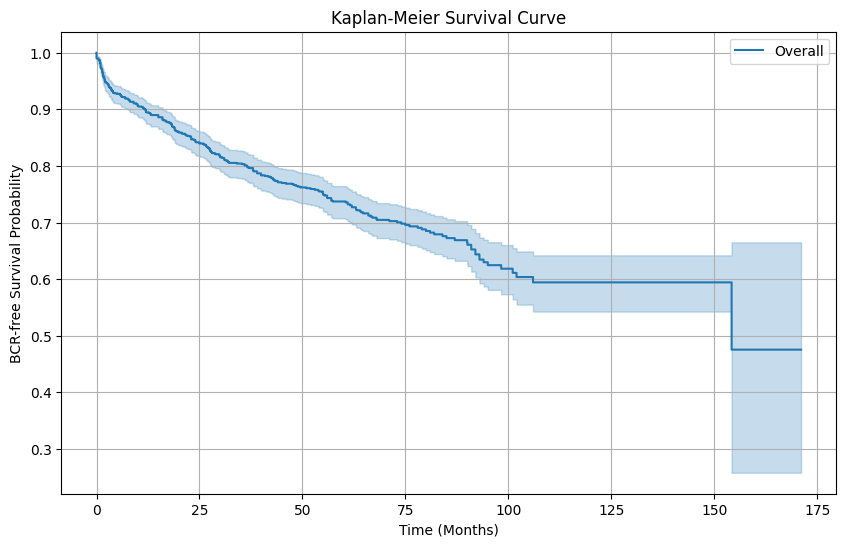

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Initialize KaplanMeierFitter model
kmf = KaplanMeierFitter()

# Convert boolean to integer (True -> 1, False -> 0) for the events parameter
event_observed = train_pdata['BCR_STATUS'].astype(int)

# Fit the model
kmf.fit(durations=train_pdata['MONTH_TO_BCR'],
        event_observed=event_observed,  # 'events' wurde zu 'event_observed' geändert
        label='Overall')

# Create the plot
plt.figure(figsize=(10, 6))
kmf.plot()

# Customize the plot
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time (Months)')
plt.ylabel('BCR-free Survival Probability')
plt.grid(True)

# Show confidence intervals
plt.fill_between(kmf.timeline,
                 kmf.confidence_interval_['KM_estimate_lower_0.95'],
                 kmf.confidence_interval_['KM_estimate_upper_0.95'],
                 alpha=0.2)

plt.tight_layout()
plt.show()

# Print some statistics
print("\nMedian survival time:", kmf.median_survival_time_)
print("\nMean survival time:", kmf.mean_survival_time_)